# t-SNE Visualizations
I'll use t-SNE to get some quick visualizations of cell line clustering before and after different normalization procedures for hte CST data. 

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from tsne import bh_sne
from copy import deepcopy

from clustergrammer import Network 
net = Network()


Define function for making two tsne plots

In [9]:
def make_tsne(mat, cmap_left=None, cmap_right=None):
    # the matrix needs to be transposed in order to cluster the numbers
    x_data = mat.transpose()

    # convert image data to float64 matrix. float64 is need for bh_sne
    x_data = np.asarray(x_data).astype('float64')

    # perform t-SNE embedding, lowered perplexity
    vis_data = bh_sne(x_data, perplexity=5)

    # plot the result
    vis_x = vis_data[:, 0]
    vis_y = vis_data[:, 1]

    fig, axarr = plt.subplots(ncols=2, figsize=(10,5))
    
    if cmap_left == None:
        axarr[0].scatter(vis_x, vis_y)
    else:
        axarr[0].scatter(vis_x, vis_y, c=cmap_left, cmap=plt.cm.get_cmap('prism',len(cmap_left)))
    
    if cmap_right == None:
        axarr[1].scatter(vis_x, vis_y)
    else:
        axarr[1].scatter(vis_x, vis_y, c=cmap_right, cmap=plt.cm.get_cmap('prism',len(cmap_right)))        

    plt.show()

Load phosphorylation data

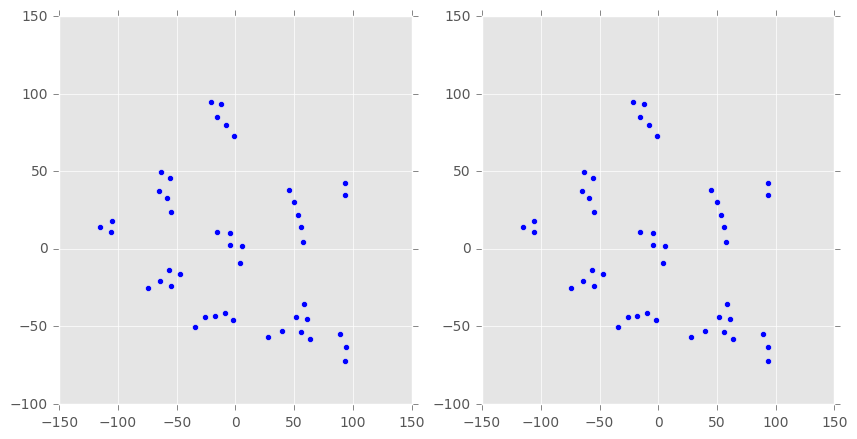

In [13]:
filename = '../lung_cellline_3_1_16/lung_cellline_phospho/' + \
'lung_cellline_TMT_phospho_combined_ratios.tsv'

# get dataframe 
net.load_file(filename)
net.swap_nan_for_zero()
# do not filter data
# net.filter_N_top('row', 100, 'sum')
inst_df = net.dat_to_df()
df = inst_df['mat']

# export dataframe into numpy matrix for tsne
tuple_cols = df.columns.tolist()
rows = df.index.tolist()
mat = df.values
df.shape

make_tsne(mat)